In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from anndata import AnnData
from scipy.io import mmread

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.19.4 scipy==1.6.3 pandas==1.2.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [3]:
results_file = 'write/SRR9990687'  # the file that will store the analysis results

In [4]:
adata = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/filtered_genefull/', var_names='gene_ids', cache=True)
##adata2 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990688/', cache=True)
##adata3 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990689/', cache=True)
##adata4 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990690/', cache=True)
##adata5 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990791/', cache=True)
##adata6 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990792/', cache=True)
##adata7 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990793/', cache=True)
##adata8 = sc.read_10x_mtx('/Users/matanatmammadli/Desktop/software_prak-main/SRR9990794/', cache=True)

... reading from cache file cache/Users-matanatmammadli-Desktop-software_prak-main-filtered_genefull-matrix.h5ad


In [5]:
adata

AnnData object with n_obs × n_vars = 2227 × 54
    var: 'gene_symbols'

normalizing counts per cell
    finished (0:00:00)


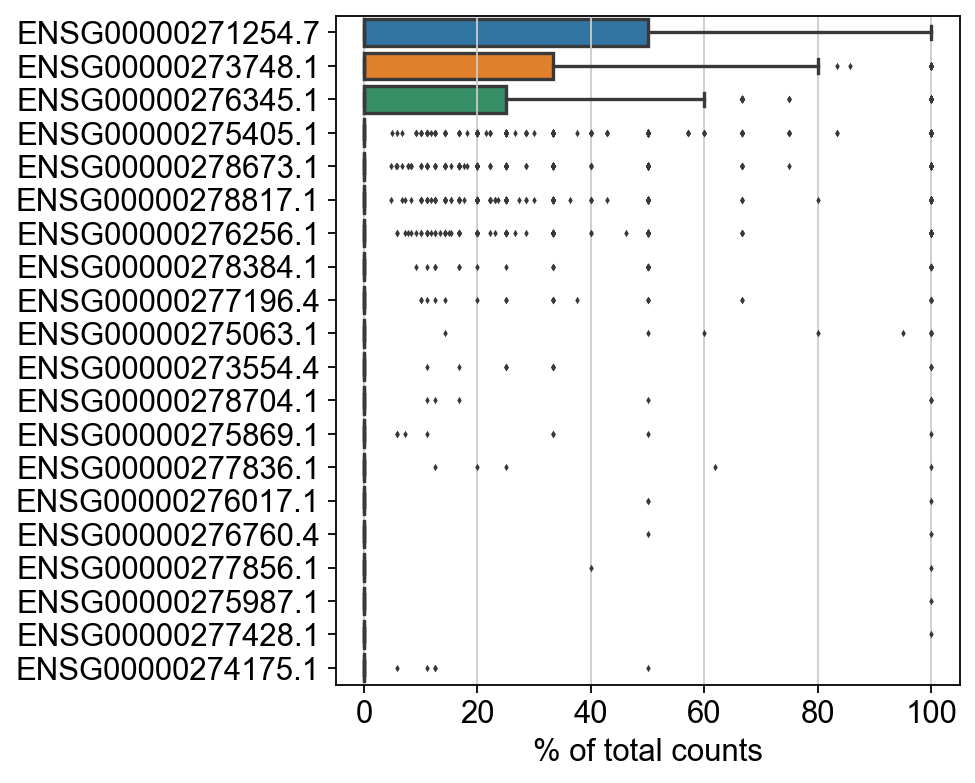

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [7]:
##sc.pp.filter_cells(adata, min_genes=200)
##sc.pp.filter_genes(adata, min_cells=3)

In [8]:
adata

AnnData object with n_obs × n_vars = 2227 × 54
    var: 'gene_symbols'

In [9]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

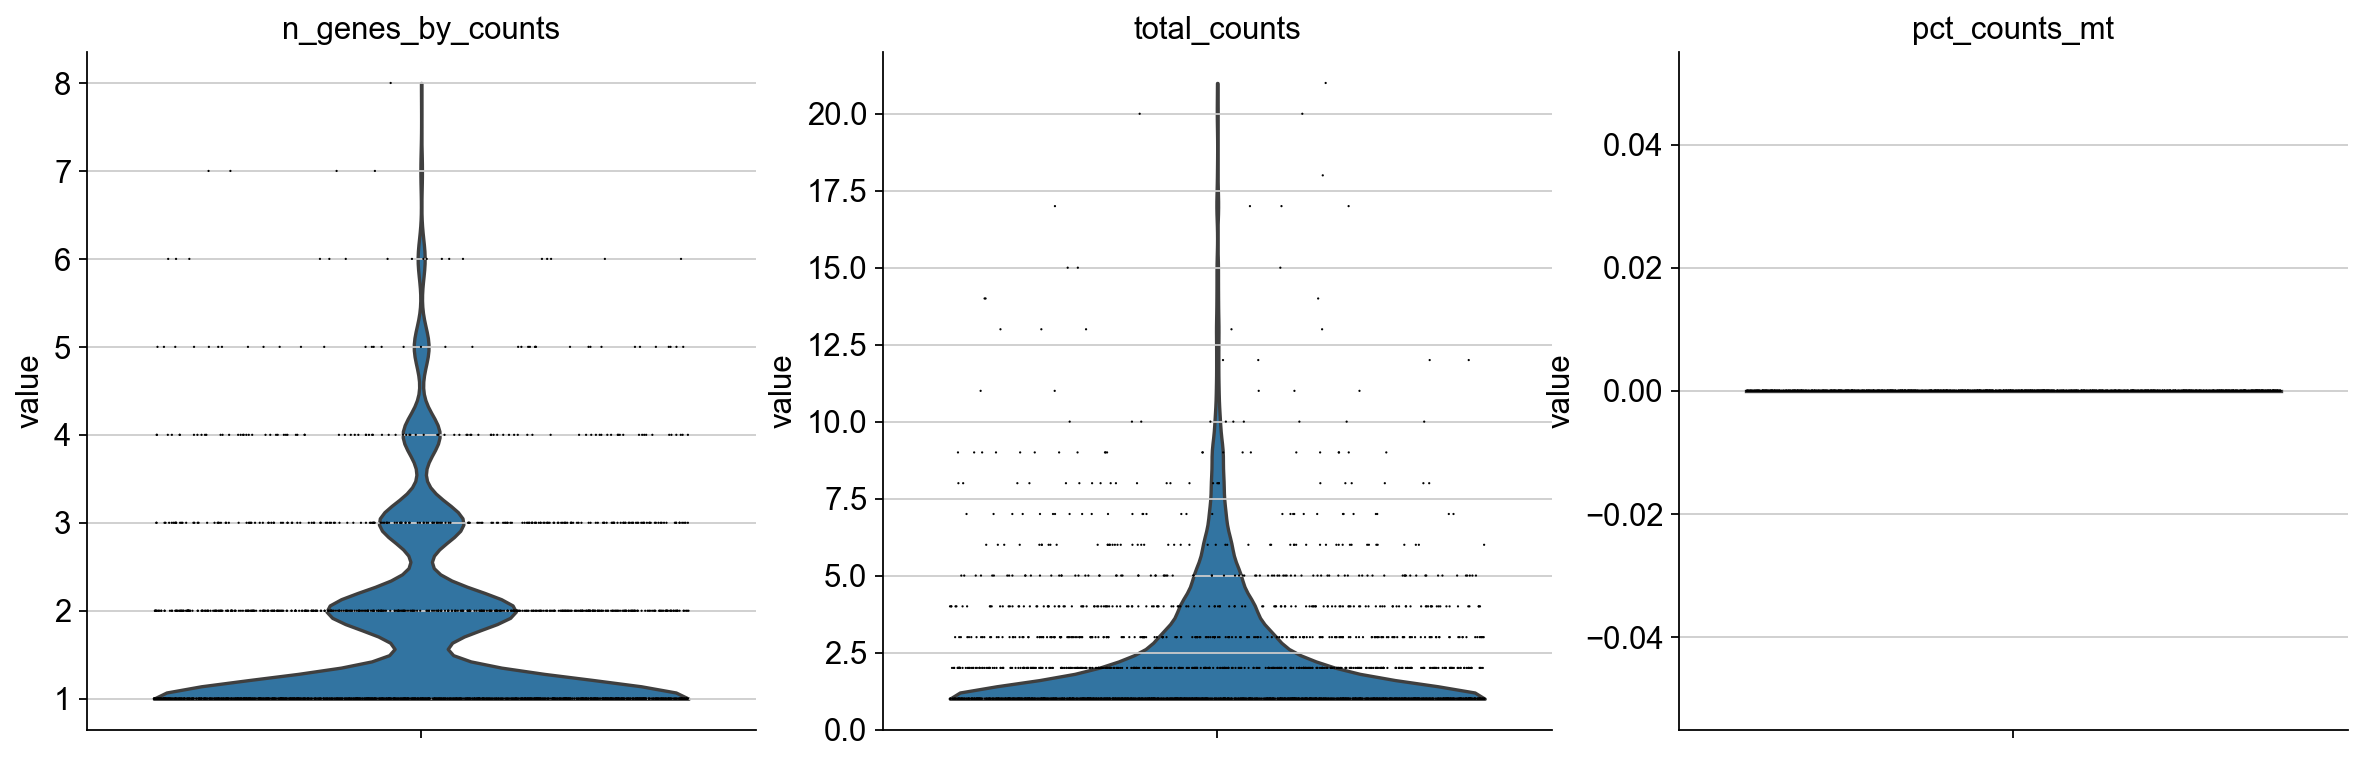

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

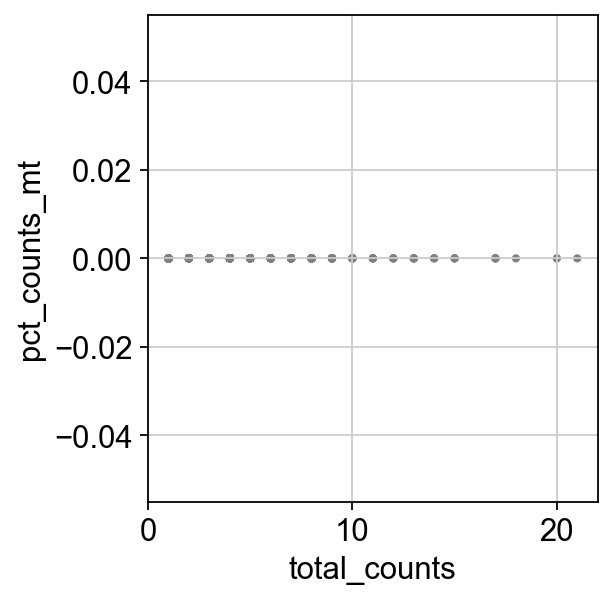

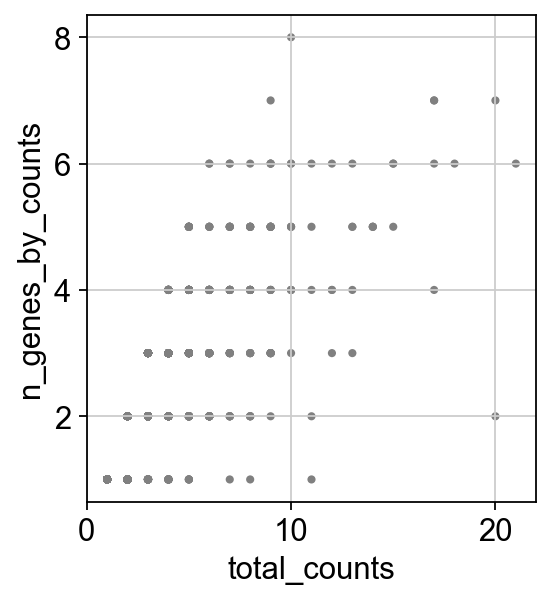

In [11]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [12]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [14]:
sc.pp.log1p(adata)

In [15]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/usr/local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:237: RuntimeWarning: invalid value encountered in true_divide
  df['dispersions_norm'] = (


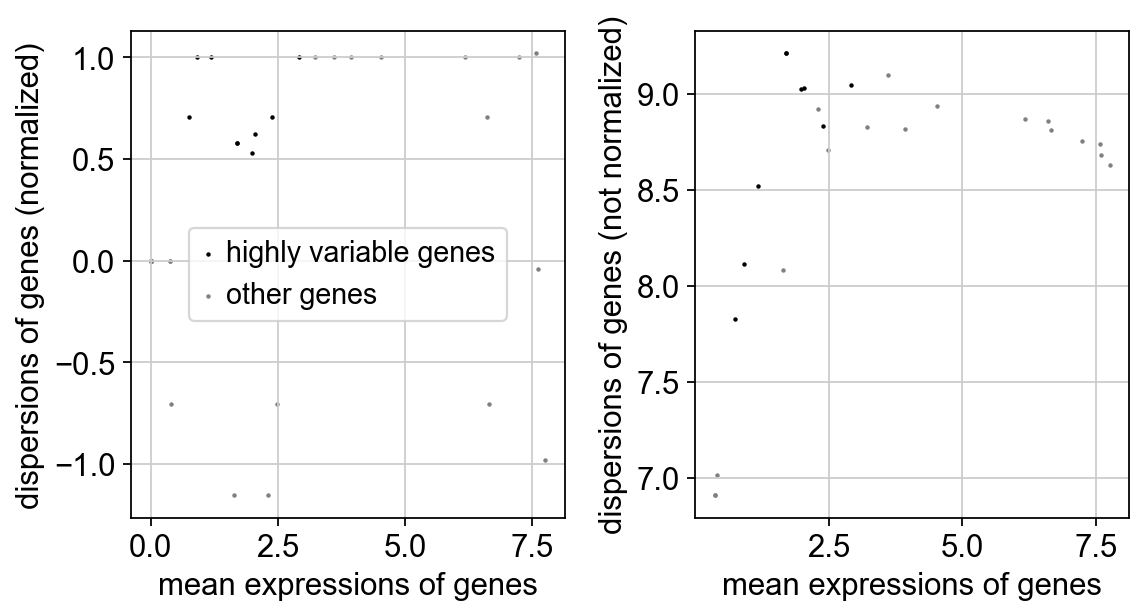

In [16]:
sc.pl.highly_variable_genes(adata)

In [17]:
adata.raw = adata

In [18]:
adata = adata[:, adata.var.highly_variable]

In [19]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:00)


In [20]:
sc.pp.scale(adata, max_value=10)

In [21]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=8
    finished (0:00:00)


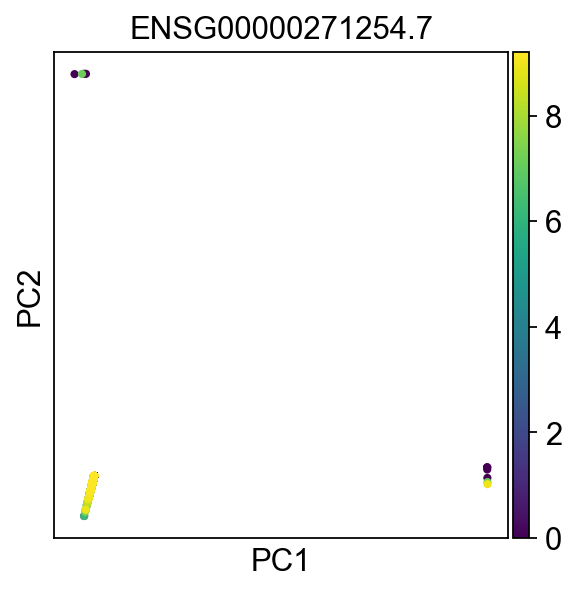

In [22]:
sc.pl.pca(adata, color='ENSG00000271254.7')

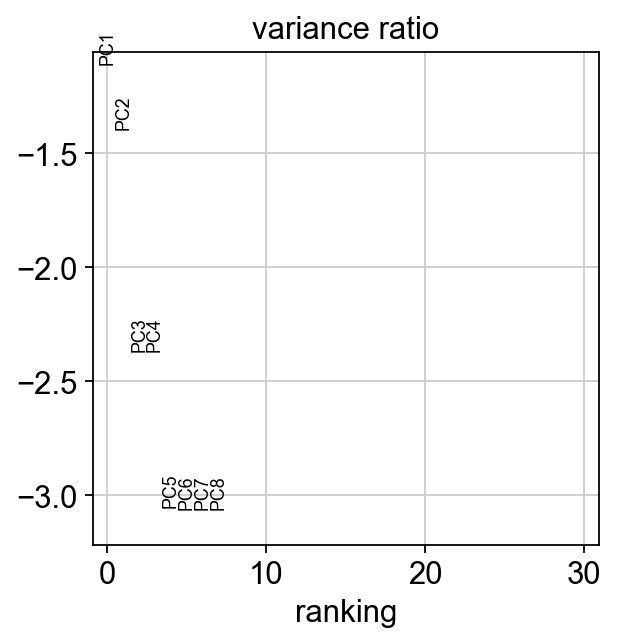

In [23]:
sc.pl.pca_variance_ratio(adata, log=True)

In [24]:
adata.write(results_file)


In [25]:
adata

AnnData object with n_obs × n_vars = 2227 × 9
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_symbols', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [26]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [27]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


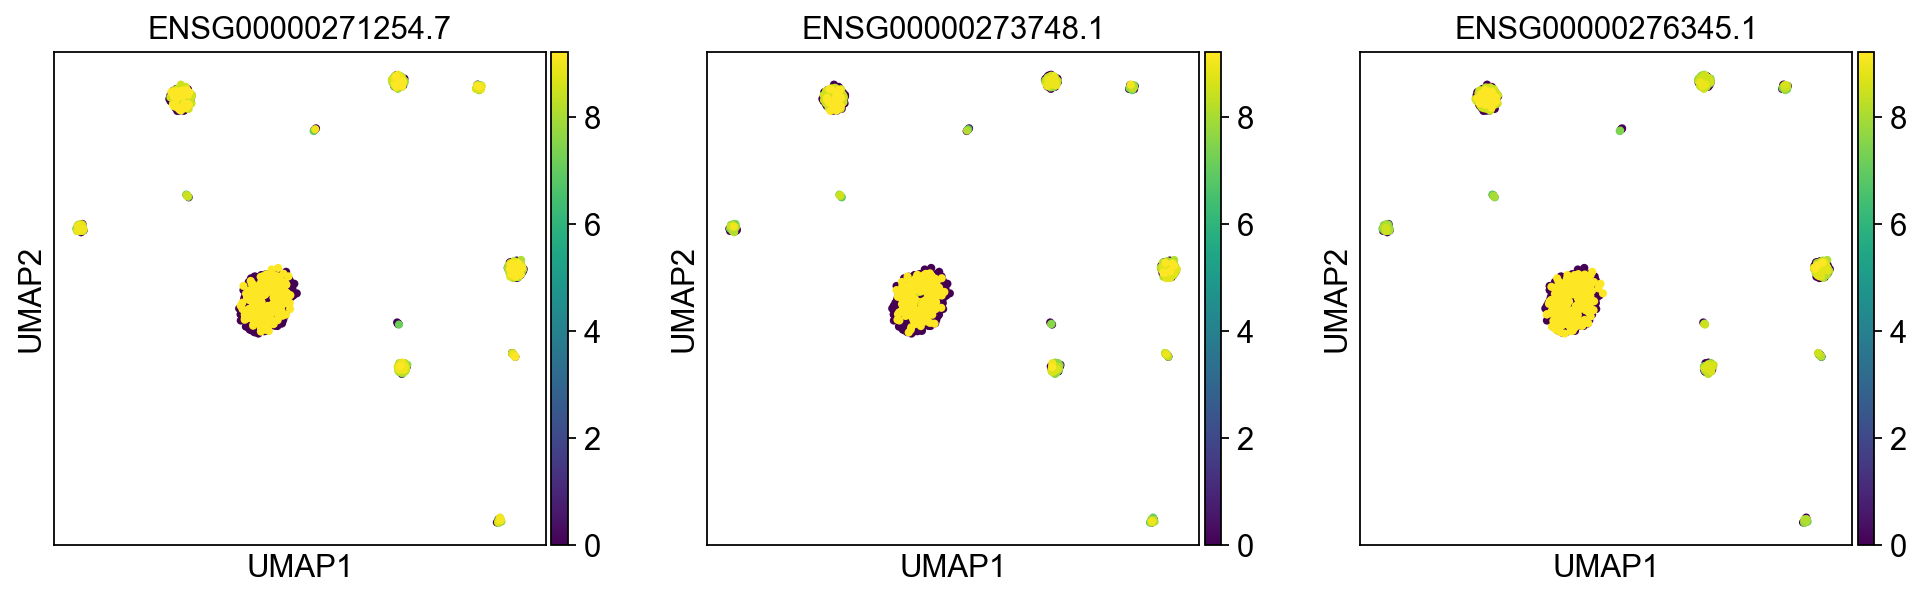

In [28]:
sc.pl.umap(adata, color=['ENSG00000271254.7','ENSG00000273748.1', 'ENSG00000276345.1'])

In [29]:
sc.pl.umap(adata, color=['ENSG00000271254.7','ENSG00000273748.1', 'ENSG00000276345.1'], use_raw=False)

KeyError: 'Could not find key ENSG00000271254.7 in .var_names or .obs.columns.'

<Figure size 1159.2x320 with 0 Axes>

In [74]:
sc.tl.leiden(adata, resolution =0.5)

running Leiden clustering
    finished (0:00:00)


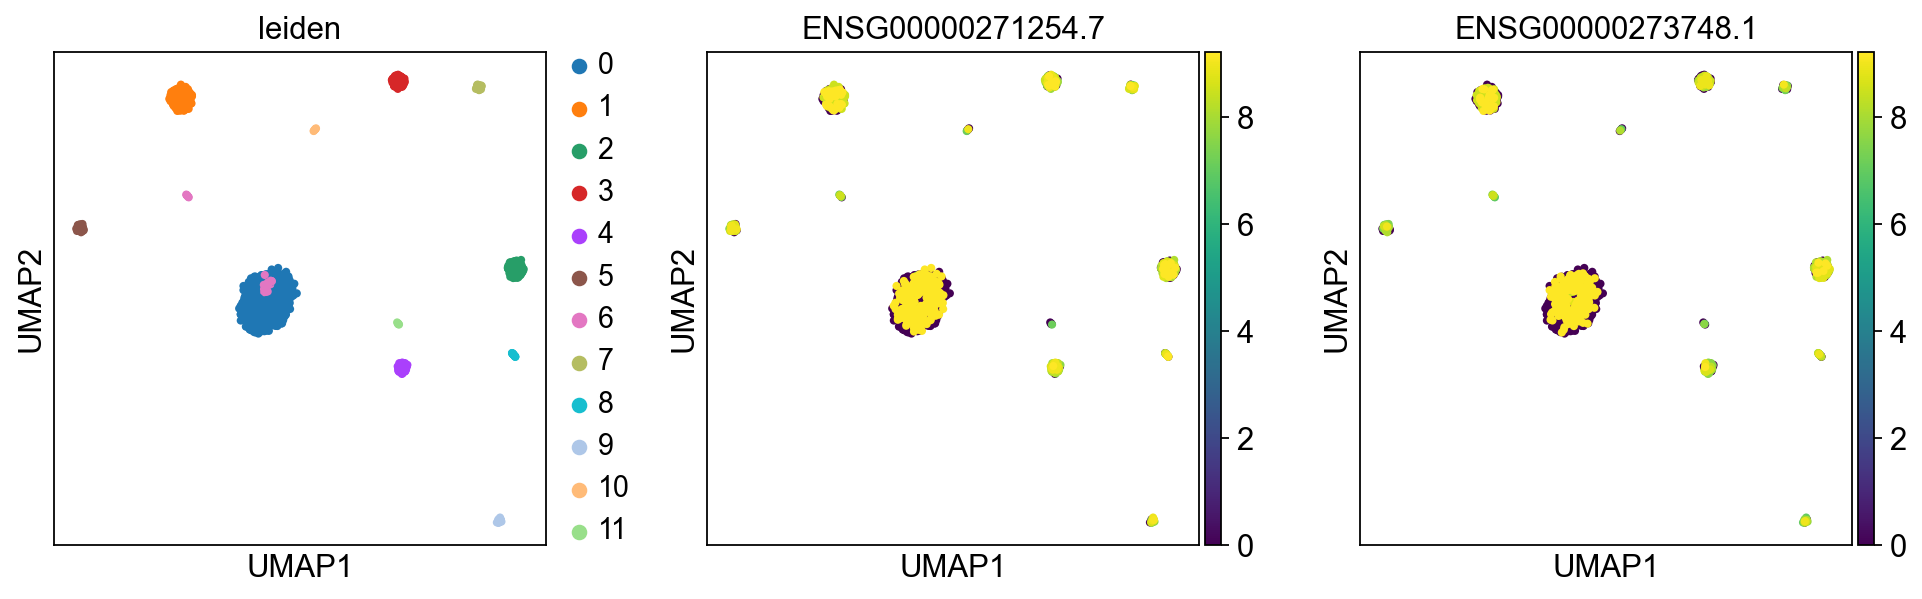

In [75]:
sc.pl.umap(adata, color=['leiden', 'ENSG00000271254.7','ENSG00000273748.1'])

In [76]:
adata.write(results_file)

ranking genes
    finished (0:00:00)


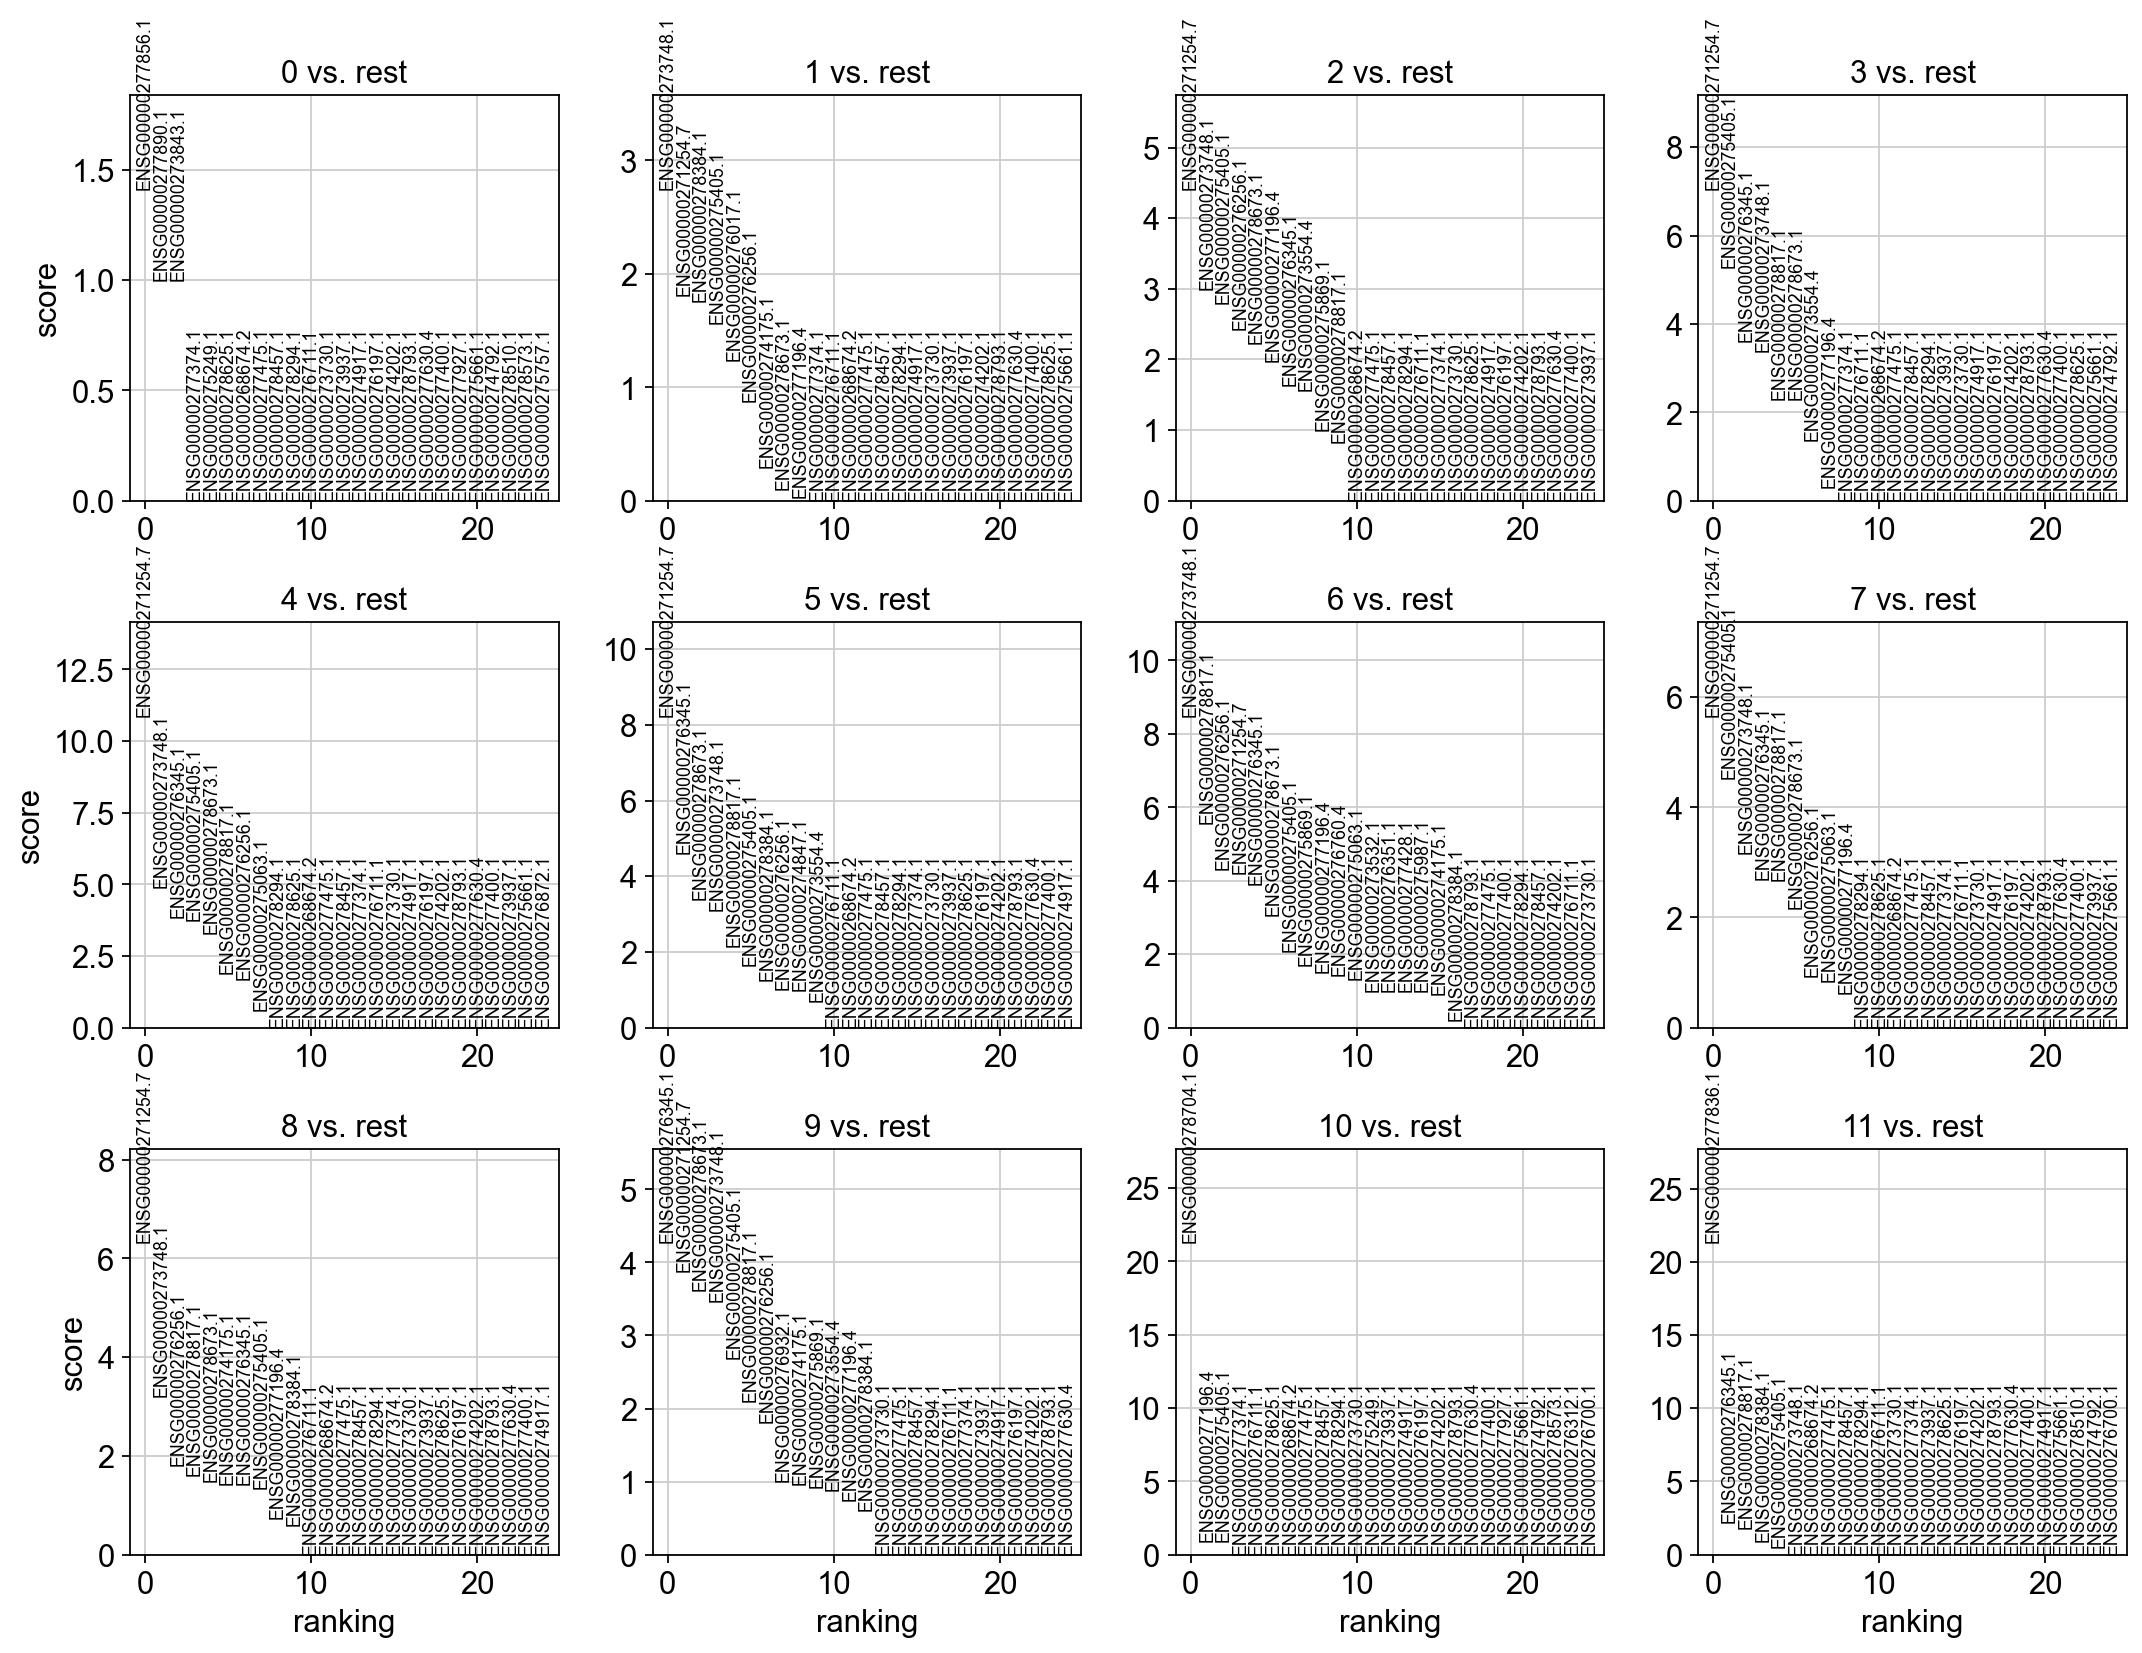

In [77]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [78]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:00)


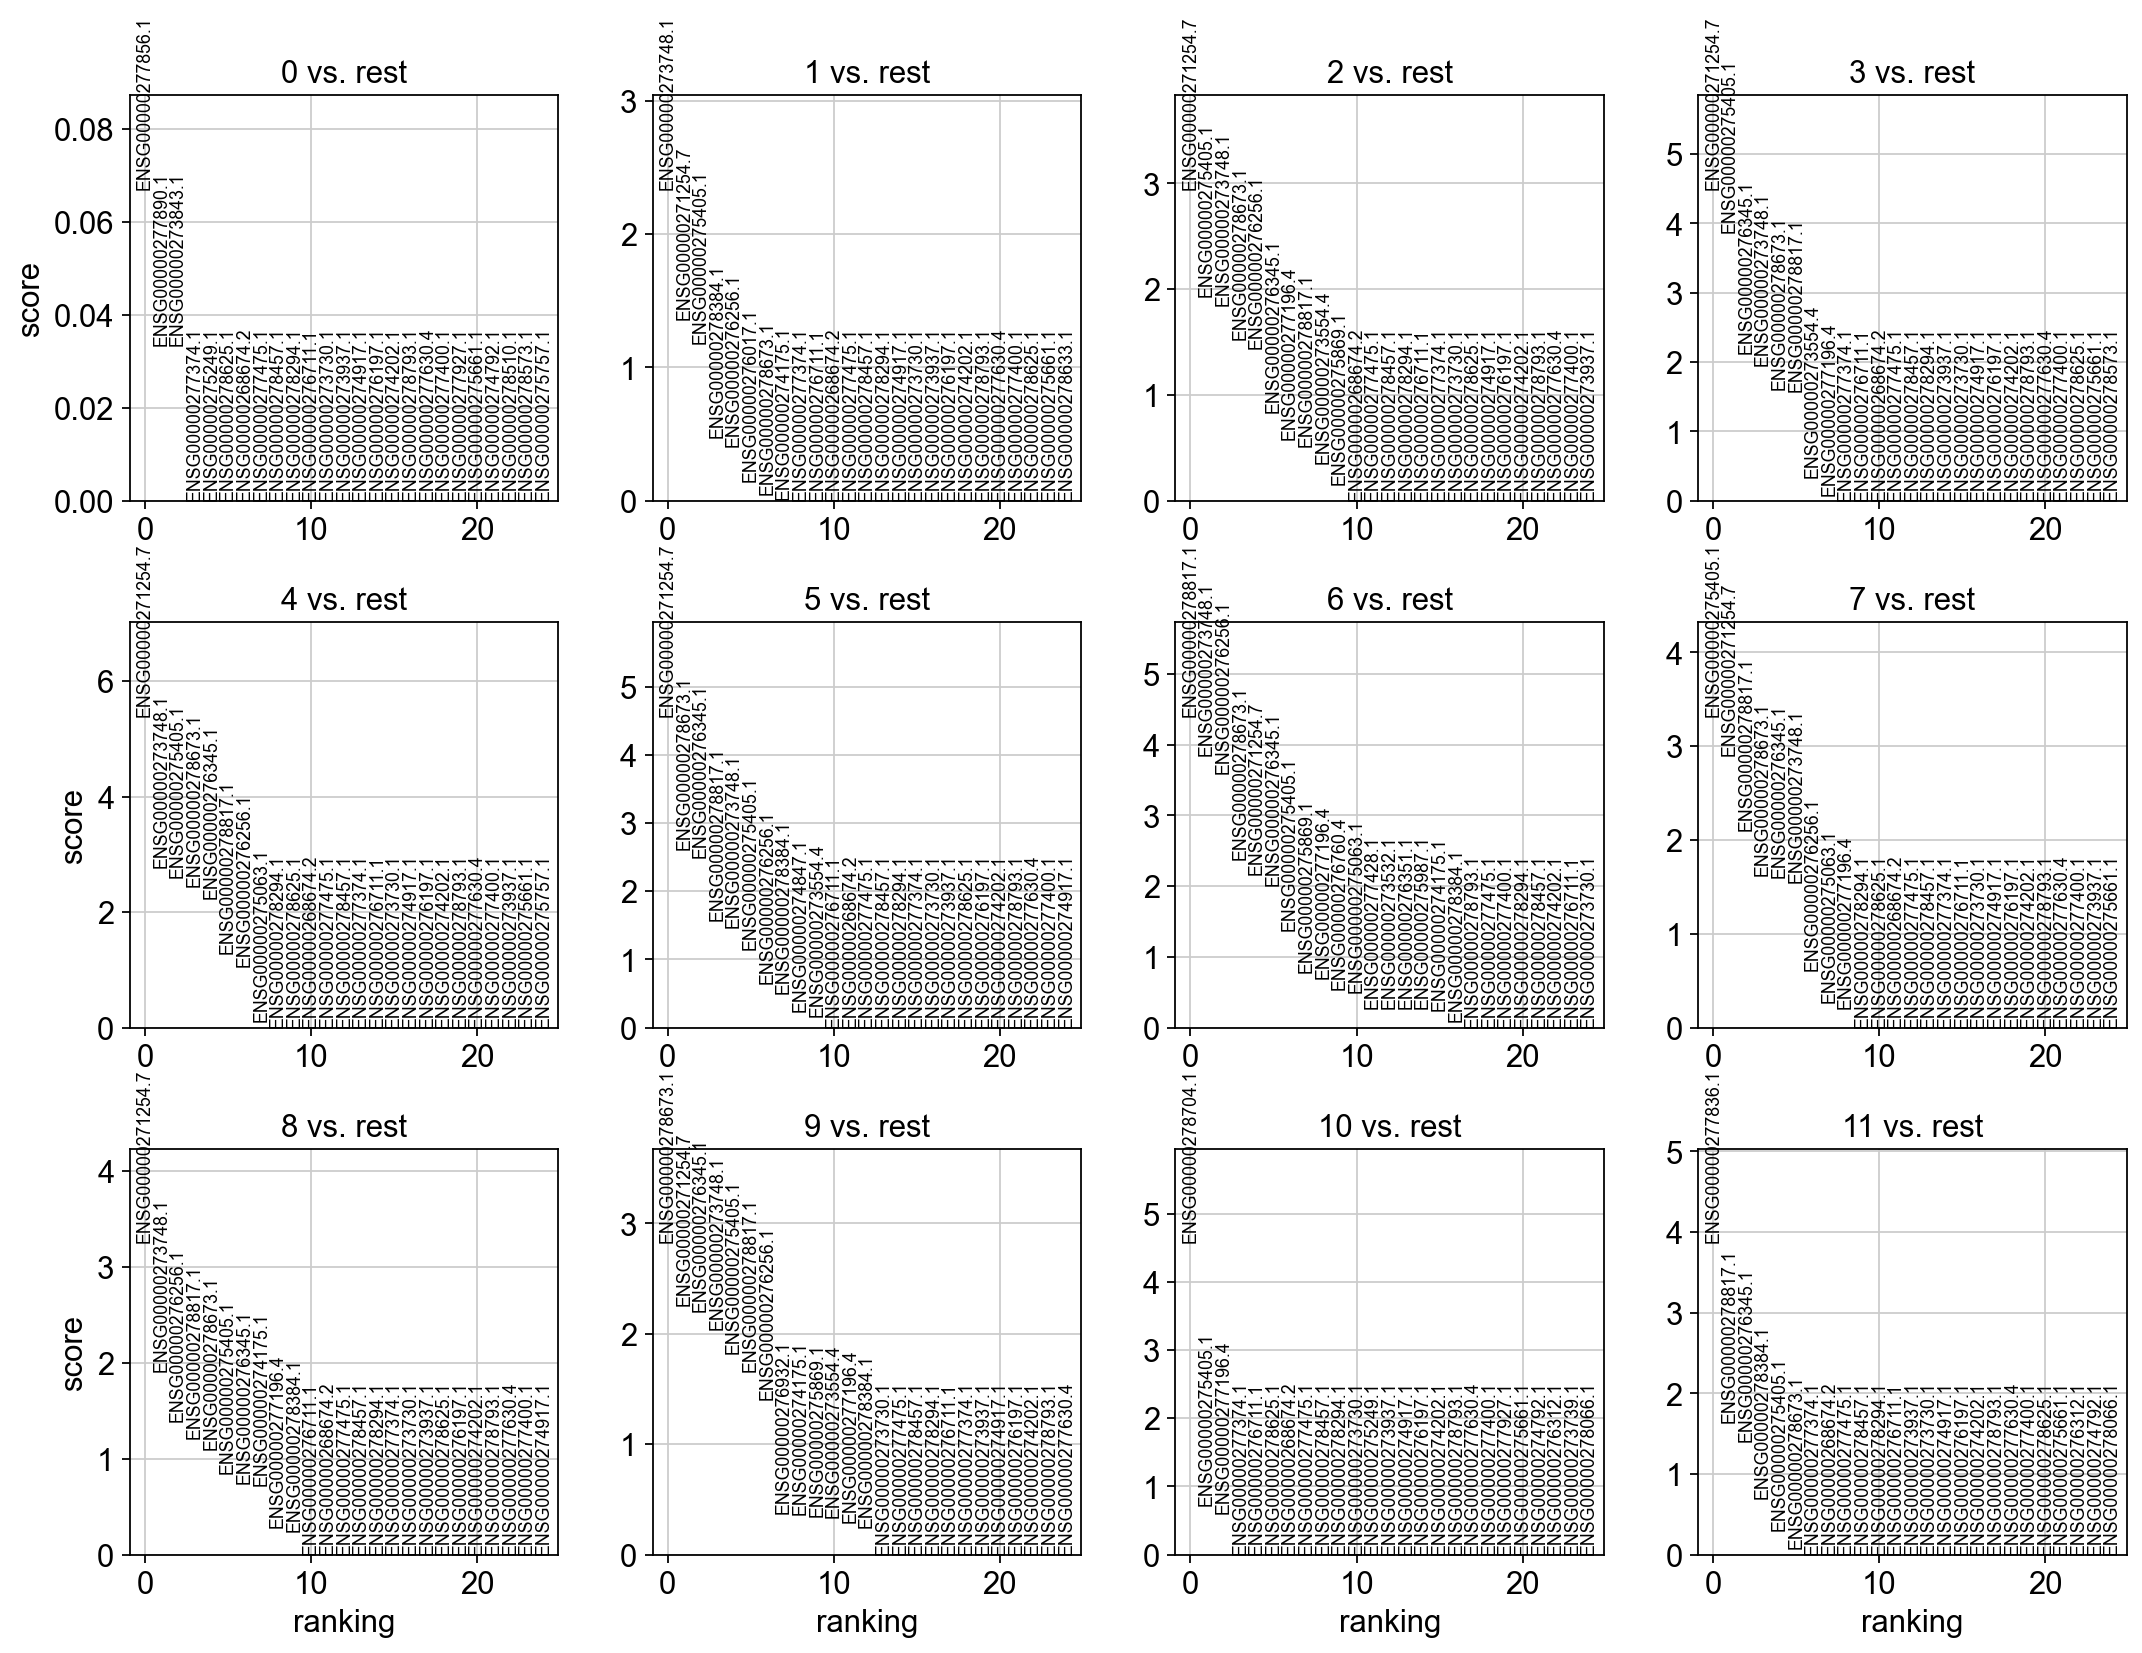

In [79]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [80]:
adata.write(results_file)

ranking genes
    finished (0:00:00)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


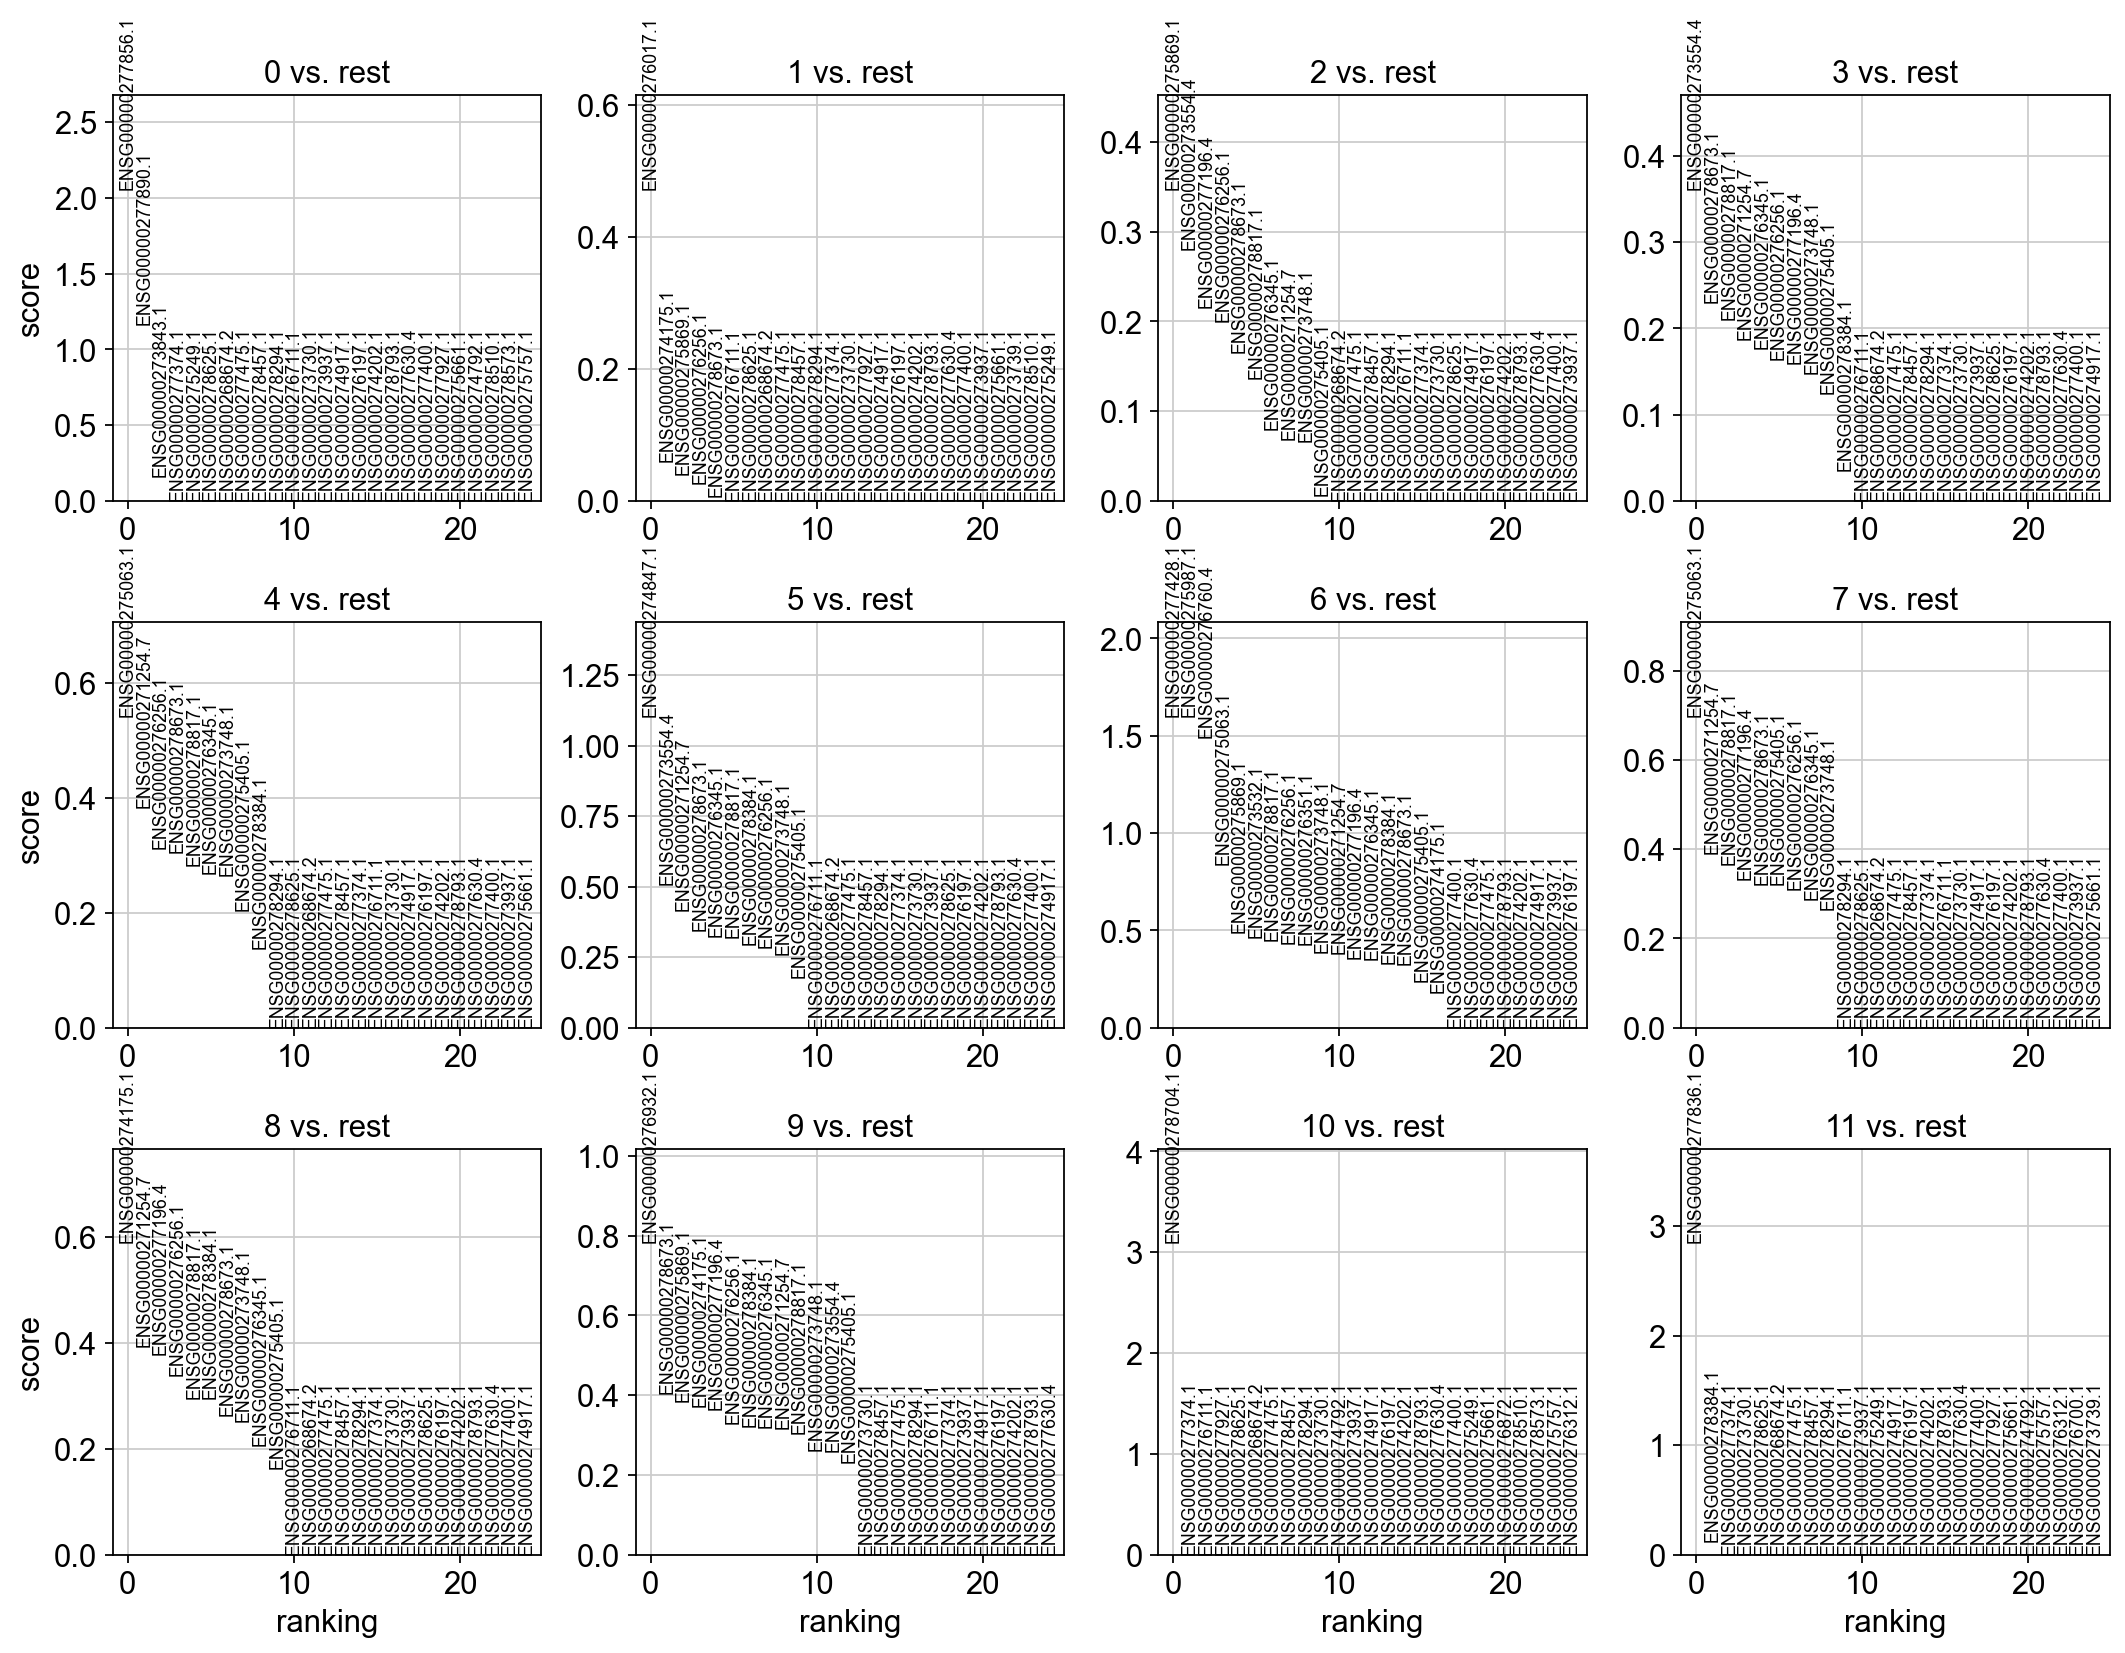

In [81]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [82]:
marker_genes = ['ENSG00000277856.1', 'ENSG00000273748.1', 'ENSG00000271254.7', 
                'ENSG00000276345.1', 'ENSG00000278704.1', 'ENSG00000277836.1']

In [83]:
adata = sc.read(results_file)

ValueError: Reading with filekey 'write/SRR9990687' failed, the inferred filename PosixPath('write/write/SRR9990687.h5ad') does not exist. If you intended to provide a filename, either use a filename ending on one of the available extensions {'tab', 'txt', 'h5ad', 'anndata', 'csv', 'tsv', 'data', 'soft.gz', 'mtx', 'loom', 'mtx.gz', 'xlsx', 'h5'} or pass the parameter `ext`.

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

In [ ]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

ranking genes
    finished (0:00:00)


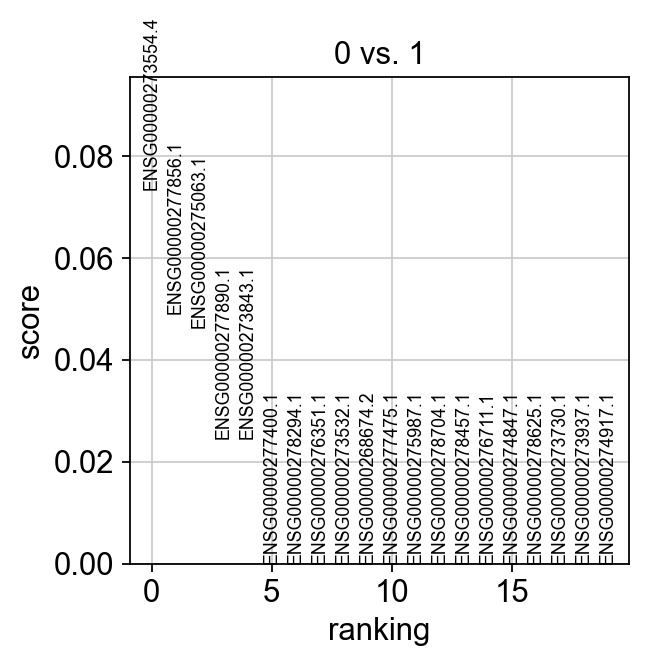

In [84]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

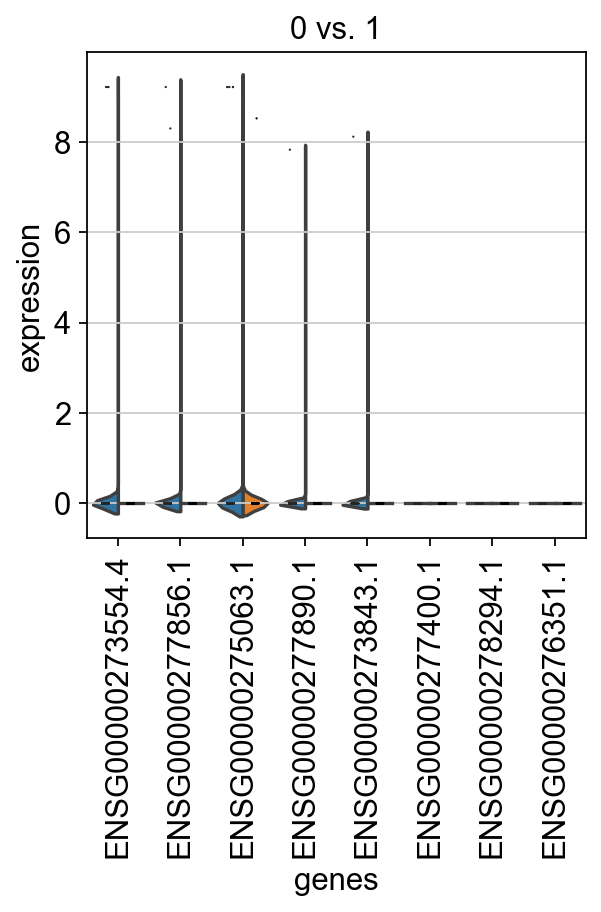

In [85]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [86]:
adata = sc.read(results_file)

ValueError: Reading with filekey 'write/SRR9990687' failed, the inferred filename PosixPath('write/write/SRR9990687.h5ad') does not exist. If you intended to provide a filename, either use a filename ending on one of the available extensions {'tab', 'txt', 'h5ad', 'anndata', 'csv', 'tsv', 'data', 'soft.gz', 'mtx', 'loom', 'mtx.gz', 'xlsx', 'h5'} or pass the parameter `ext`.

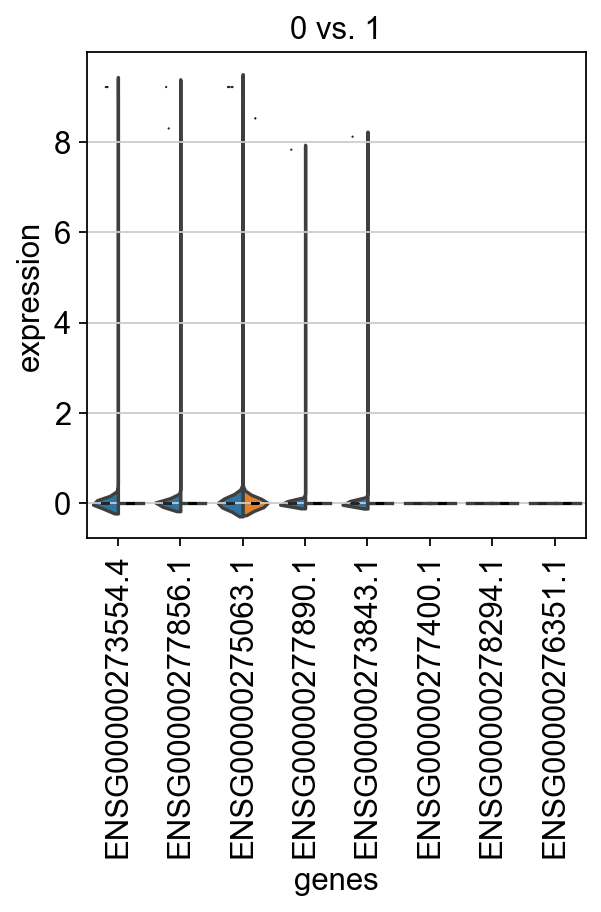

In [87]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

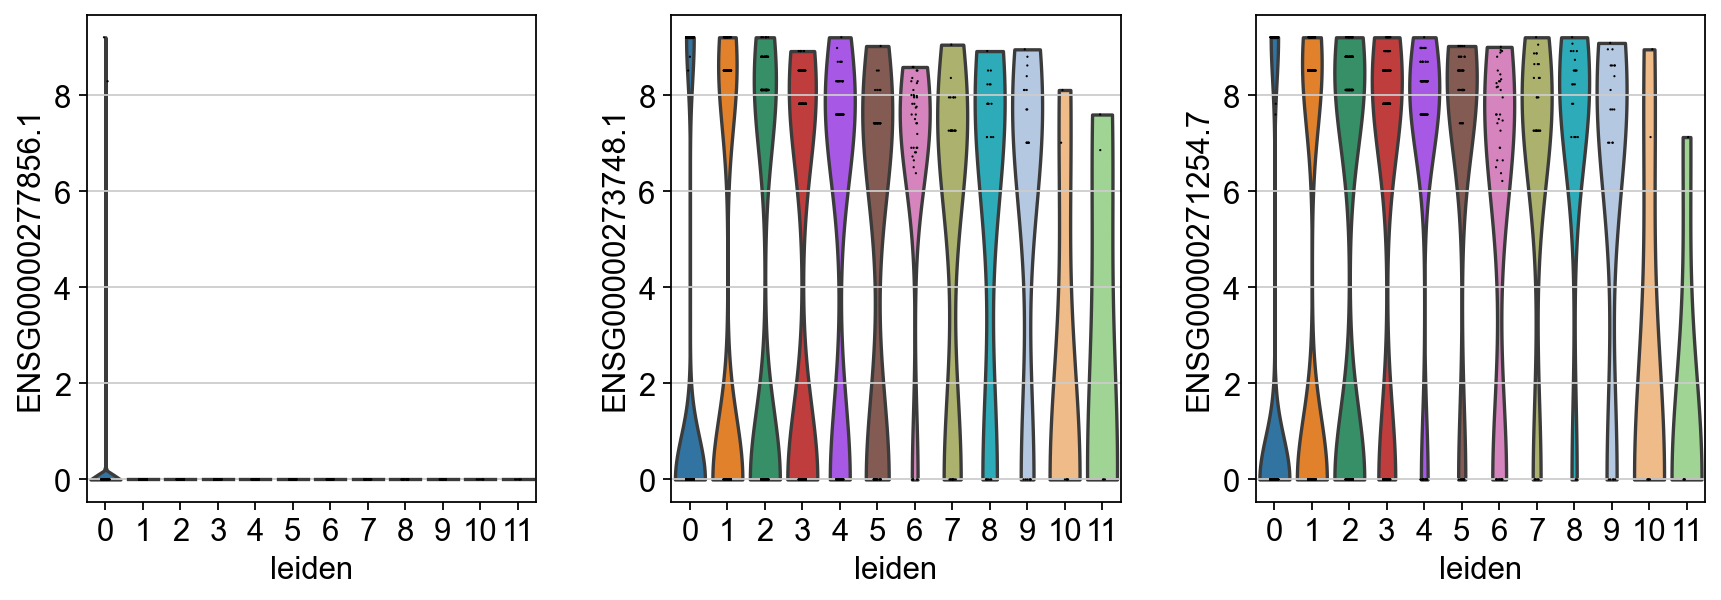

In [88]:
sc.pl.violin(adata, ['ENSG00000277856.1', 'ENSG00000273748.1', 'ENSG00000271254.7'], groupby='leiden')

In [89]:
new_cluster_names = ['Plasma cells', 'Ionocytes',
    'Spermatocytes', 'Extravillous trophoblasts',
    'Alveolar cells type 2', 'B-cells']
adata.rename_categories('leiden', new_cluster_names)

ValueError: new categories need to have the same number of items as the old categories!

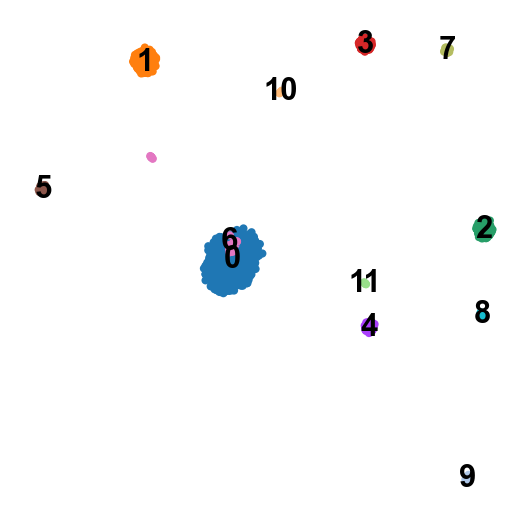

In [90]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')


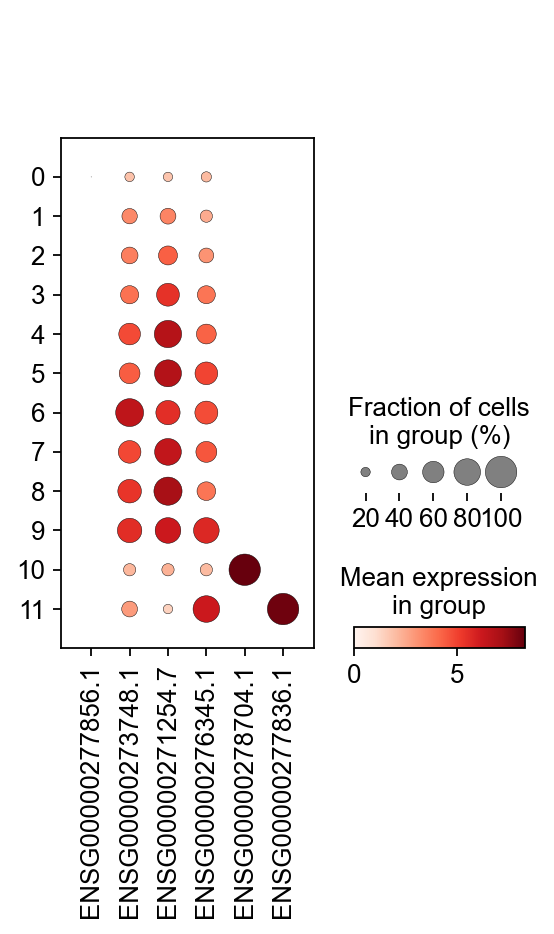

In [91]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');


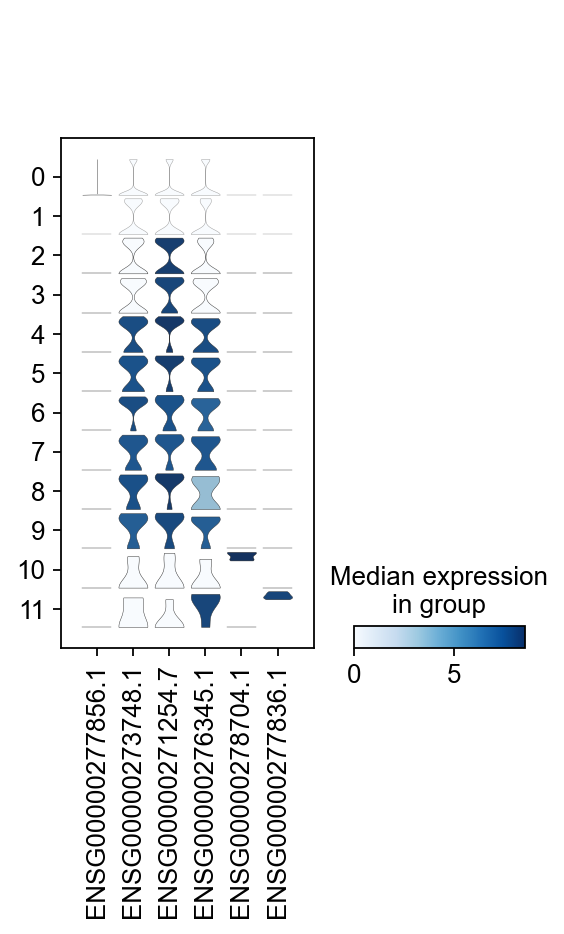

In [92]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);


In [93]:
adata

AnnData object with n_obs × n_vars = 2227 × 9
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_symbols', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'